# Drifter Relase Locations on Nemo Grid

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean
import time
import datetime
from dateutil.parser import parse
from salishsea_tools import viz_tools
from salishsea_tools import geo_tools
from salishsea_tools import grid_tools
from salishsea_tools import utilities
%matplotlib inline

In [7]:
nemo_mask =xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSn2DMeshMaskV17-02").tmaskutil.sel(gridX = slice(10, 364), gridY = slice(200, 739)).isel(time = 0)
grid = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSnBathymetryV17-02").sel(gridX = slice(10, 364), gridY = slice(200, 739))

In [44]:
grid_lat = grid.latitude
grid_lon = grid.longitude

In [43]:
## consumes lat lon of any corrdinate and lat lon values on grid and return the indices and distance to the nearest grid point
def find_closest_index(lat, lon, grid_lat = grid_lat, grid_lon = grid_lon):
    distances = geo_tools.haversine(lon, lat, grid_lon, grid_lat)
    index = np.unravel_index(np.argmin(distances), distances.shape)
    return (index, np.min(distances.values))

In [93]:
dt=np.dtype({'names':['dates'],'formats':['S100']})

In [94]:
loadtxt = open('Temp/Pawlowicz_drift_release_dates.txt', 'r')
drifters = np.loadtxt(loadtxt, usecols =(0,1,2), delimiter = ',')
loadtxt = open('Temp/Pawlowicz_drift_release_dates.txt', 'r')
dates = np.loadtxt(loadtxt, usecols =(3), delimiter = ',', dtype=dt)

In [128]:
parsed = []
for date in dates:
    parsed.append(parse(date[0]))
parsed = np.asarray(parsed)
parsed = parsed[..., np.newaxis]

In [136]:
all_data = np.concatenate((drifters, parsed), axis = 1)

Text(0.5, 1.0, 'Nearest grid points to drifter release')

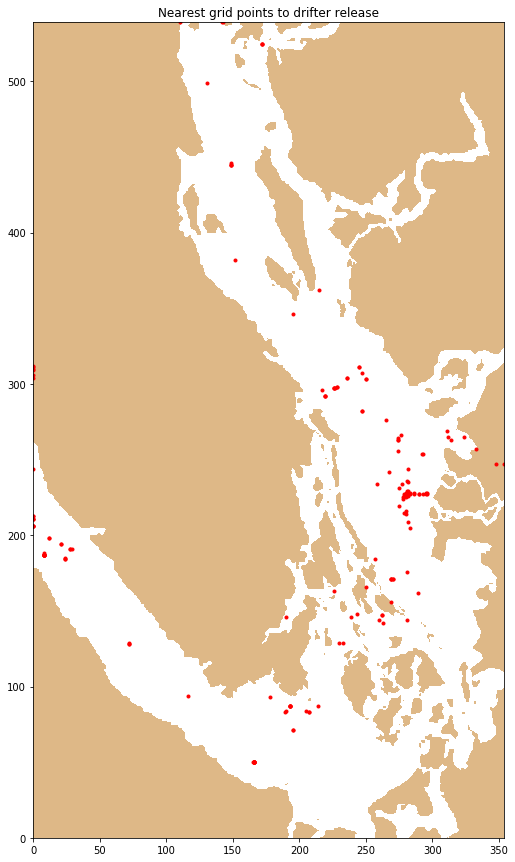

In [159]:
fig = plt.figure(figsize = (15,15))
ax = plt.subplot(111)
plt.contourf(nemo_mask, levels = [-0.1,0.1], colors = 'burlywood')
for drifter in  all_data:
    index = find_closest_index(drifter[1], drifter[0])[0]
    plt.plot(index[1], index[0], 'r.')
viz_tools.set_aspect(ax)
plt.title('Nearest grid points to drifter release')